<a href="https://colab.research.google.com/github/curiosityr0ver/Machine-Learning-Intro/blob/main/Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd

In [2]:
np.random.seed(42)

# boston_df = pd.read_csv("BostonHousing.csv")
calf_csv = fetch_california_housing()
calf_df =pd.DataFrame(calf_csv.data, columns=calf_csv.feature_names)
calf_df["target"]= pd.DataFrame(calf_csv.target)

In [3]:
X = calf_df.drop("target", axis = 1)
Y = calf_df["target"]

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [5]:
model.score(x_test, y_test)

0.8066196804802649

In [6]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error, accuracy_score, precision_score, recall_score, f1_score

In [7]:
y_test_mean = np.full(len(y_test), y_test.mean())
y_preds = model.predict(x_test)

In [8]:
r2_score(y_test, y_preds)
mean_absolute_error(y_test, y_preds)

0.3265721842781009

In [9]:
  df = pd.DataFrame()
  df["Actual"] = y_test
  df["Prediction"] = y_preds
  df["Absolute Error"] = df["Actual"] - df["Prediction"] 
  df["Squared Error"] = df["Absolute Error"] * df["Absolute Error"]
  df.loc['Total'] = df.sum(numeric_only=True)
  df

,Actual,Prediction,Absolute Error,Squared Error
20046,0.47700,0.493840,-0.016840,0.000284
3024,0.45800,0.754940,-0.296940,0.088173
15663,5.00001,4.928596,0.071414,0.005100
20484,2.18600,2.540290,-0.354290,0.125521
9814,2.78000,2.331760,0.448240,0.200919
...,...,...,...,...
16623,2.66800,1.947760,0.720240,0.518746
18086,5.00001,4.836378,0.163632,0.026775
2144,0.72300,0.717820,0.005180,0.000027
3665,1.51500,1.679010,-0.164010,0.026899


In [10]:
from sklearn.ensemble import RandomForestClassifier
heart_df = pd.read_csv("heart-disease.csv")
X = heart_df.drop("target", axis = 1)
Y = heart_df["target"]

In [11]:
x_test, x_train, y_test, y_train = train_test_split(X, Y, test_size = 0.2)
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.7892561983471075

In [12]:
y_preds = clf.predict(x_test)

In [13]:
print("Accuracy:", accuracy_score(y_test,y_preds))
print("Precision:", precision_score(y_test,y_preds))
print("Recall:", recall_score(y_test,y_preds))
print("f1:", f1_score(y_test,y_preds))
print("MAE:", mean_absolute_error(y_test,y_preds))
print("MSE:", mean_squared_error(y_test,y_preds))

Accuracy: 0.7892561983471075
Precision: 0.740506329113924
Recall: 0.9212598425196851
f1: 0.8210526315789473
MAE: 0.21074380165289255
MSE: 0.21074380165289255


In [14]:
import matplotlib.pyplot as plt
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


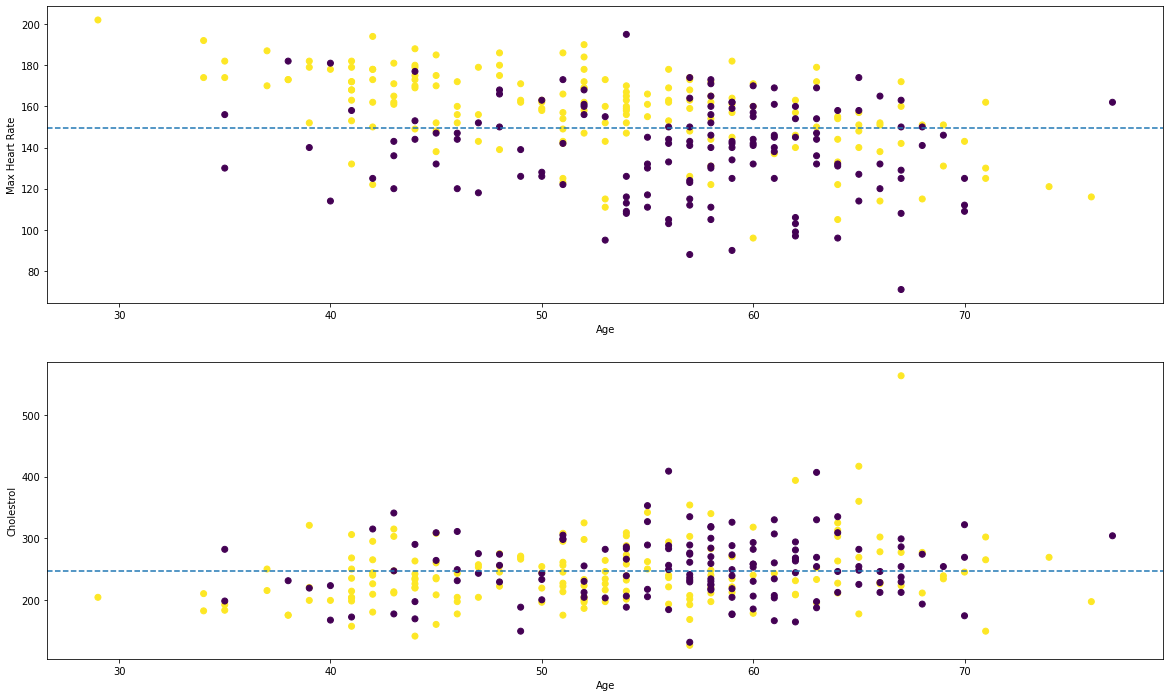

In [15]:
fig, ax = plt.subplots(nrows = 2, figsize = (20, 12))
ax[0].set(xlabel = "Age", ylabel = "Max Heart Rate")
ax[0].scatter(x = heart_df["age"],y = heart_df["thalach"], c = heart_df["target"])
ax[0].axhline(heart_df["thalach"].mean(), linestyle = "dashed")
ax[1].set(xlabel = "Age", ylabel = "Cholestrol")
ax[1].scatter(x = heart_df["age"],y = heart_df["chol"], c = heart_df["target"])
ax[1].axhline(heart_df["chol"].mean(), linestyle = "dashed")

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.64      0.74       115
           1       0.74      0.92      0.82       127

    accuracy                           0.79       242
   macro avg       0.81      0.78      0.78       242
weighted avg       0.81      0.79      0.78       242



In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

cv_acc = cross_val_score(clf, X, Y, cv = 5)
cv_acc

array([0.81967213, 0.8852459 , 0.78688525, 0.8       , 0.75      ])

## Improving model

First prediction = Baseline predictions
First model = Baseline model

In [45]:
def evaluate_preds(y_true, y_preds):
  acc = accuracy_score(y_true, y_preds)
  prec = precision_score(y_true, y_preds)
  recall = recall_score(y_true, y_preds)
  f1 = f1_score(y_true, y_preds)
  mae = mean_absolute_error(y_true,y_preds)
  mse = mean_squared_error(y_true,y_preds)
  return {
      "accuracy" : acc,
      "precision" : prec,
      "recall" : recall,
      "f1" : f1,
      "mae": mae,
      "mse": mse
  }

In [19]:
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [20]:
# Shuffling data
heart_df = heart_df.sample(frac = 1)

In [21]:
X = heart_df.drop("target",axis = 1)
Y = heart_df["target"]
# Splitting data for training, testing and validation

n1 = round(len(X)*0.7)
n2 = round(len(X)*0.85)
x_train = X[:n1]
x_valid = X[n1:n2]
x_test = X[n2:]
y_train = Y[:n1]
y_valid = Y[n1:n2]
y_test = Y[n2:]
len(x_train), len(x_valid), len(x_test)

(212, 46, 45)

In [22]:
#Baseline model
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
evaluate_preds(y_test, clf.predict(x_test))

Accuracy: 0.8222222222222222
Precision: 0.875
Recall: 0.875
f1: 0.875
MAE: 0.17777777777777778
MSE: 0.17777777777777778


In [23]:
#Manually tuning hyper-parameters
clf2 = RandomForestClassifier(n_estimators = 1000, max_depth=10)
clf2.fit(x_train, y_train)
clf2.score(x_test, y_test)
evaluate_preds(y_test, clf2.predict(x_test))

Accuracy: 0.8222222222222222
Precision: 0.875
Recall: 0.875
f1: 0.875
MAE: 0.17777777777777778
MSE: 0.17777777777777778


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
#Trying large no of hyper-parameters

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth" : [None, 5, 10, 15, 20, 30],
        "max_features": ["auto","sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4 ]
        }

clf3 = RandomForestClassifier()

clf3 = RandomizedSearchCV(estimator = clf, param_distributions = grid, n_iter = 10, cv = 5, verbose = 2)

clf3.fit(x_train, y_train)
clf3.score(x_test, y_test)

In [25]:
 clf3.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [28]:
#Predictions with best parameters
new_y_preds = clf3.predict(x_test)
evaluate_preds(y_test, clf3.predict(x_test))

Accuracy: 0.7777777777777778
Precision: 0.8666666666666667
Recall: 0.8125
f1: 0.8387096774193549
MAE: 0.2222222222222222
MSE: 0.2222222222222222


In [34]:
#Brute force all possible hyper-parameters
from sklearn.model_selection import GridSearchCV, train_test_split

In [49]:
grid2 = {"n_estimators": [200, 500, 1000],
        "max_depth" : [None, 5, 10, 30],
        "max_features": ["auto","sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2]
        }

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

clf4 = RandomForestClassifier(n_jobs=1)

gs_clf4 = GridSearchCV(clf4, param_grid = grid2, cv = 5, verbose = 2)
clf4.fit(x_train, y_train)
clf4.score(x_train, y_train)
evaluate_preds(y_test, clf4.predict(x_test))

{'accuracy': 0.8032786885245902,
 'precision': 0.8333333333333334,
 'recall': 0.78125,
 'f1': 0.8064516129032259,
 'mae': 0.19672131147540983,
 'mse': 0.19672131147540983}

<AxesSubplot:>

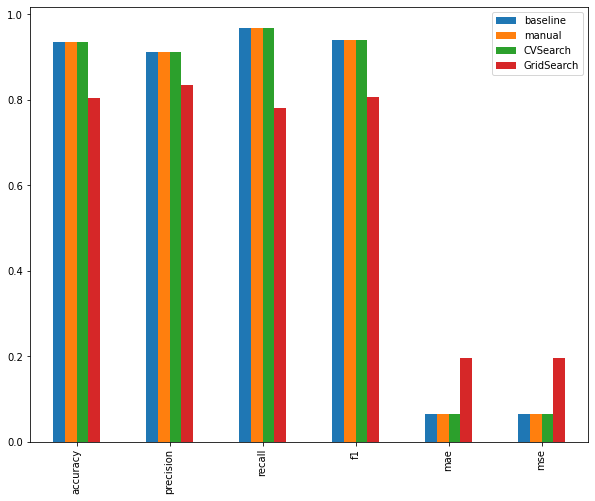

In [55]:
#Comparing models

compare_models = pd.DataFrame({
    "baseline": evaluate_preds(y_test, clf.predict(x_test)),
    "manual": evaluate_preds(y_test, clf2.predict(x_test)),
    "CVSearch": evaluate_preds(y_test, clf3.predict(x_test)),
    "GridSearch": evaluate_preds(y_test, clf4.predict(x_test))
})
compare_models.plot.bar(figsize = (10,8))

In [59]:
  #Saving and loading trained model
  import pickle

  pickle.dump(clf4, open("best_random_forest_model_for_heart", "wb"))

  loaded_model = pickle.load(open("best_random_forest_model_for_heart", "rb"))

  loaded_model.score(x_test, y_test)

0.8032786885245902